In [1]:
import numpy as np
import scipy.optimize
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calc_mu(X):
    T = X.shape[0]
    N = X.shape[1]
    res = np.zeros(N)
    for t in range(T):
        res += X[t]
    return res / T

def calc_sigma(X):
    T = X.shape[0]
    N = X.shape[1]
    mu = calc_mu(X)
    res = np.zeros((N, N))
    for t in range(T):
        res += np.outer(X[t] - mu, (X[t] - mu).T)
    return res / T

def calc_alternative_answer(X):
    T = X.shape[0]
    return 2 / (T - 1) * np.sum(X[:-1], axis=0) - X[-1]

def f(x, base, Sigma):
    X = np.vstack((base, x))
    Sigma_ = calc_sigma(X)
    return np.linalg.norm(Sigma - Sigma_, ord=2)

def project_to_psd_cone(A):
  eigvals, eigvecs = np.linalg.eigh(A)
  eigvals[eigvals < 0] = 0
  A_psd = np.dot(eigvecs, np.dot(np.diag(eigvals), eigvecs.T))
  return A_psd

def get_two_answers(T, X_, SigmaT1):
    N = X_.shape[1]
    SigmaT1 = project_to_psd_cone(SigmaT1)
    SigmaT = calc_sigma(X_)
    muT = calc_mu(X_)
    A = (SigmaT1 - T/(T+1) * SigmaT) * (T+1)**2/T
    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return (-np.sqrt(S[0]) * U.T[0].reshape(N, 1) + muT.reshape(N, 1)).T, (np.sqrt(S[0]) * U.T[0].reshape(N, 1) + muT.reshape(N, 1)).T

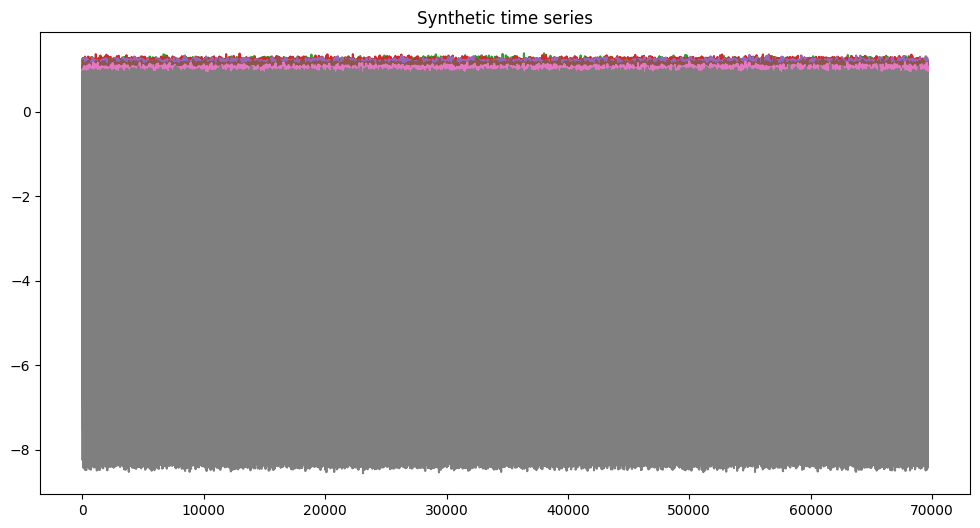

In [6]:
data = pd.read_csv('ETTm1.csv')

T = data.shape[0]
N = data.shape[1]

X = data.T.to_numpy()
for i in range(N):
    X[:, i] = np.sin(np.arange(T) / 2) * i**0.7 + np.cos(np.arange(T) / 3) - i * 0.5 + np.random.normal(0, 0.05, T)

plt.figure(figsize=(12, 6))
plt.plot(X)
plt.title('Synthetic time series')
plt.show()

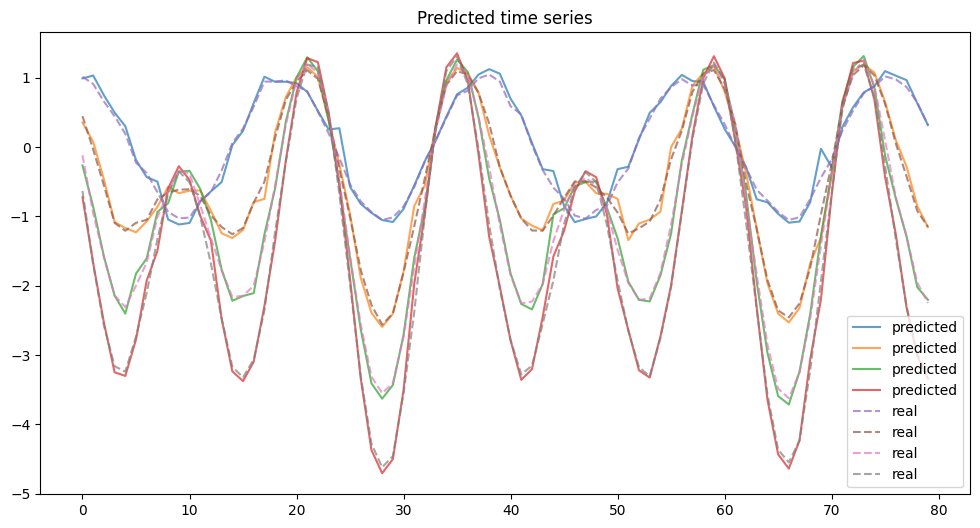

MAE: 0.07138082852590595


In [85]:
# Experiment with K = 2, T1 = 10, T2 = 20, N(0, 0.01) noise

predicted = []
real = []
T = [10, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.01, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

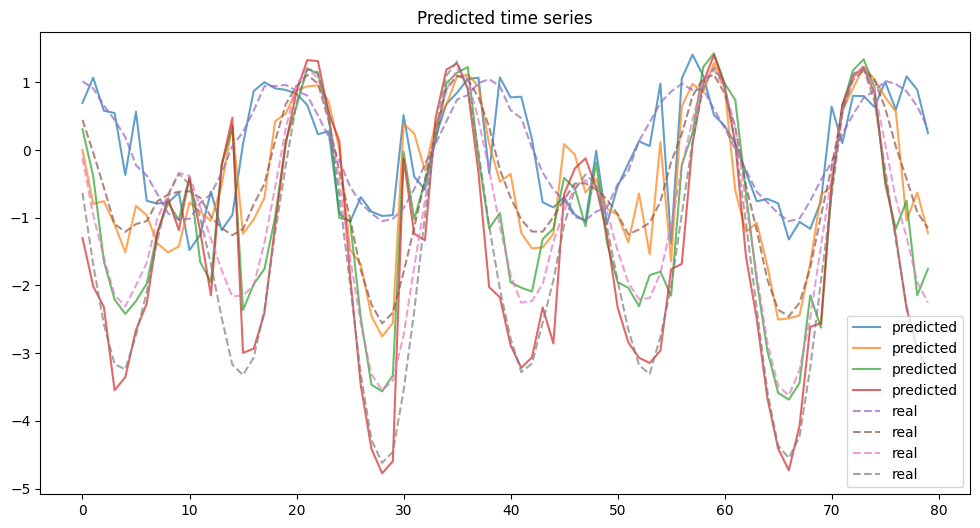

MAE: 0.332110038718645


In [86]:
# Experiment with K = 2, T1 = 10, T2 = 20, N(0, 0.05) noise

predicted = []
real = []
T = [10, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.05, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

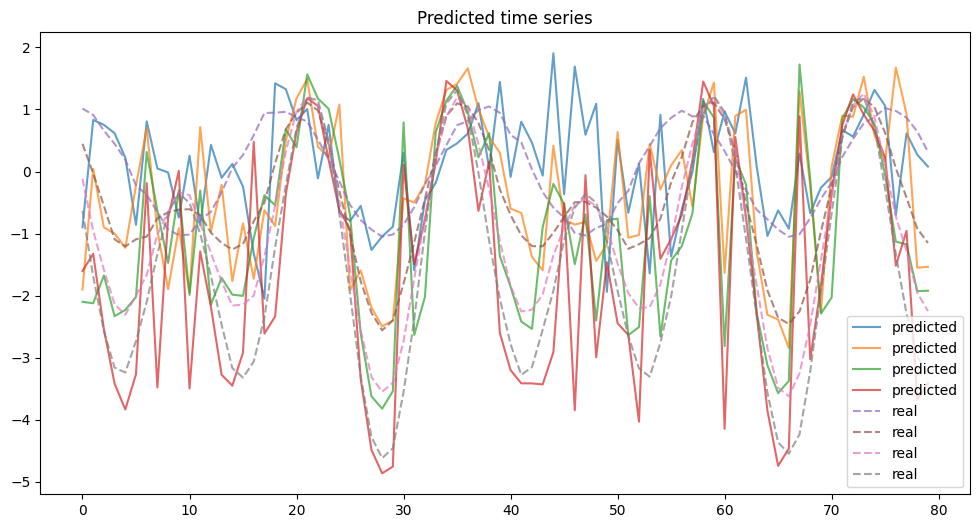

MAE: 0.6925966752955155


In [87]:
# Experiment with K = 2, T1 = 10, T2 = 20, N(0, 0.05) noise

predicted = []
real = []
T = [10, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.1, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

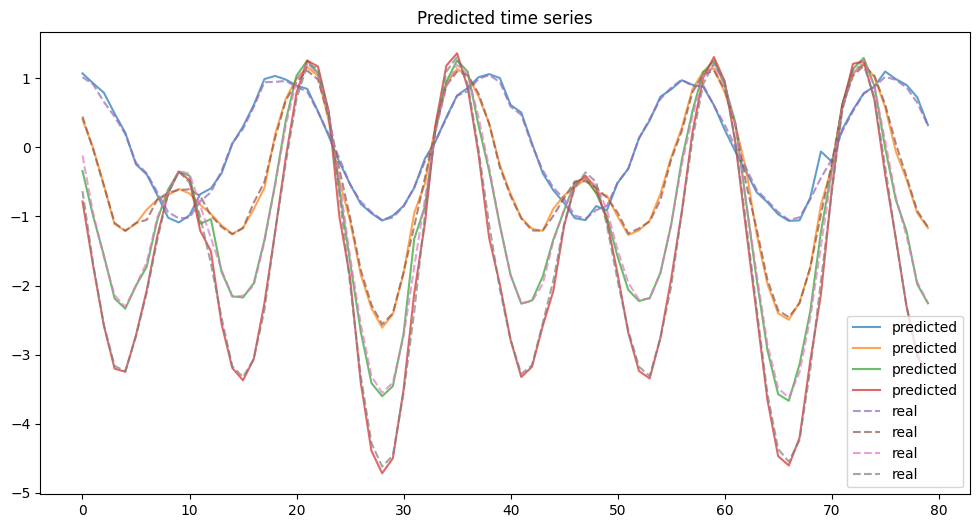

MAE: 0.0540489595528356


In [90]:
predicted = []
real = []
T = [5, 10, 15, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.01, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

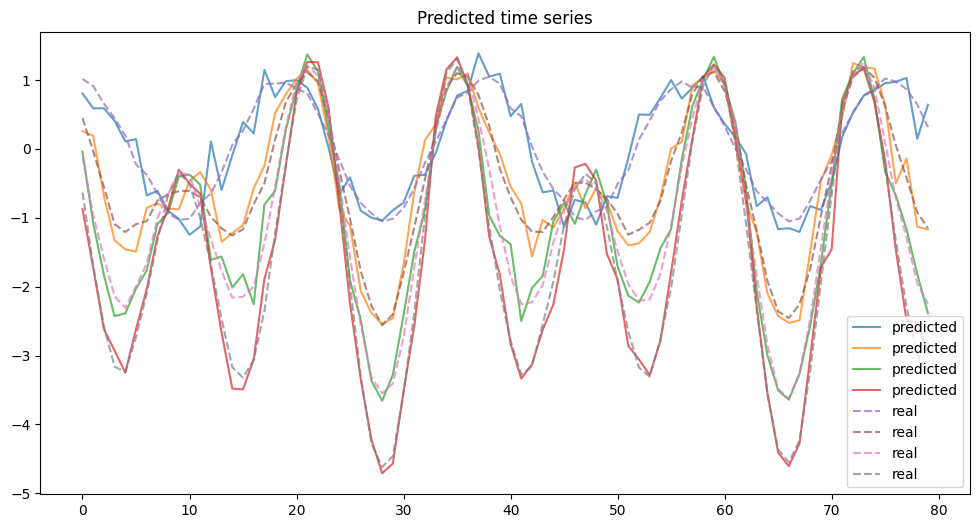

MAE: 0.1643103441487881


In [91]:
predicted = []
real = []
T = [5, 10, 15, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.05, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

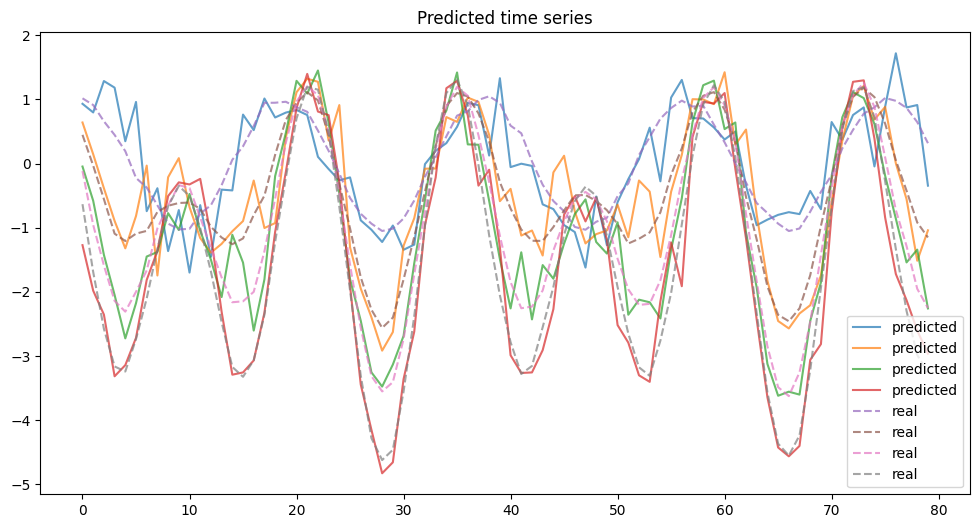

MAE: 0.29367322950500246


In [92]:
predicted = []
real = []
T = [5, 10, 15, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.1, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

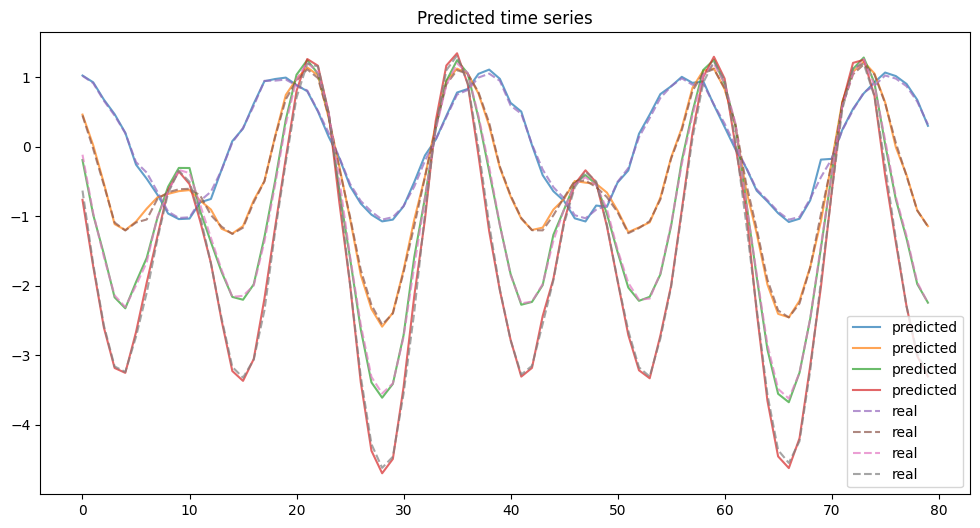

MAE: 0.040628792063258916


In [93]:
predicted = []
real = []
T = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.01, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

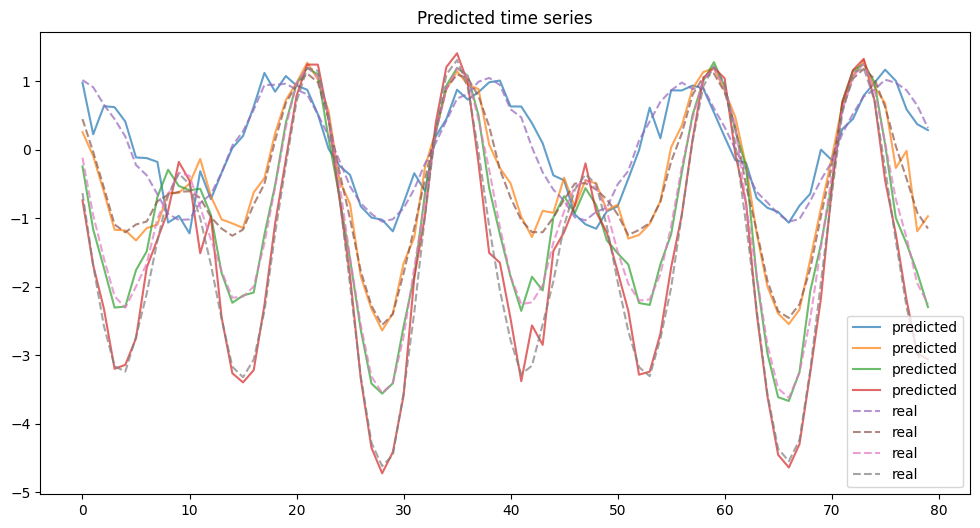

MAE: 0.13747031703238638


In [94]:
predicted = []
real = []
T = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.05, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)

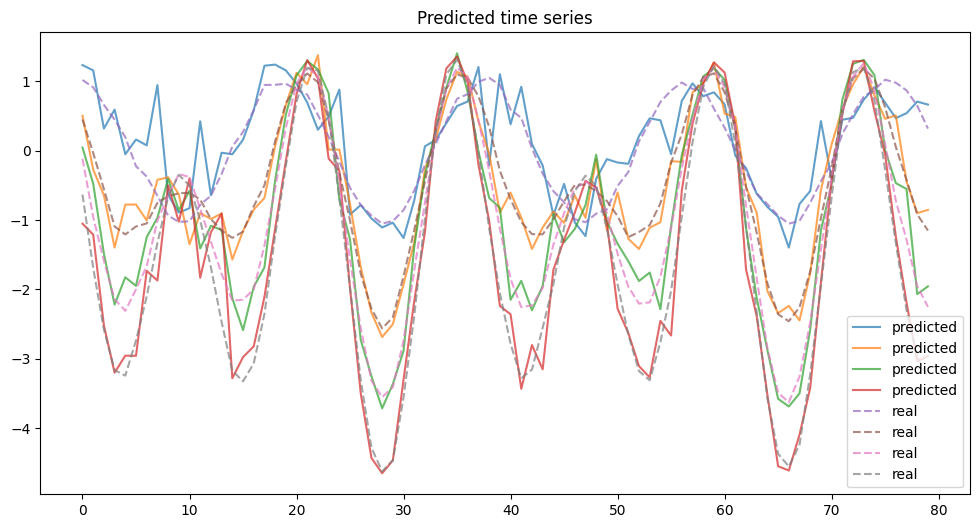

MAE: 0.23045426030258404


In [97]:
predicted = []
real = []
T = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
maxT = max(T)

for i in range(maxT, 100):
    X_ = X[i-maxT:i]

    Sigma = [calc_sigma(X_[-Ti:]) for Ti in T]
    for i in range(len(Sigma)):
        Sigma[i] += np.random.normal(0, 0.1, Sigma[i].shape)
    y_hats = [get_two_answers(Ti, X_[-Ti:-1], Sigma[j]) for j, Ti in enumerate(T)]

    min_diameter = 1e9
    best_mask = None
    for mask in range(1 << len(T)):
        anses = [ y_hats[i][mask >> i & 1][0] for i in range(len(T)) ]
        diameter = 0
        for i in range(len(T)):
            for j in range(i+1, len(T)):
                diameter = max(diameter, np.linalg.norm(anses[i] - anses[j]))
        if diameter < min_diameter:
            min_diameter = diameter
            best_mask = mask
    

    mean = np.zeros(N)
    for i in range(len(T)):
        mean += y_hats[i][best_mask >> i & 1][0] / len(T)
    predicted.append(mean)
    real.append(X_[-1])

predicted = np.array(predicted)
plt.figure(figsize=(12, 6))
plt.plot(predicted, label='predicted', alpha=0.7)
plt.plot(real, label='real', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Predicted time series')
plt.show()
MAE = np.mean(np.abs(predicted - real))
print('MAE:', MAE)